<a href="https://colab.research.google.com/github/syedanida/SEMMA-CreditCardFraudDetection/blob/main/semma_credit_card_fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn

In [3]:
import sklearn
print(sklearn.__version__)


1.5.2


In [4]:
pip install --upgrade scikit-learn


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler

In [20]:
# Load the dataset
data = pd.read_csv('creditcard 3.csv')

# Display the first few rows of the dataset
print(data.head())


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

***Step 1: Sampling***

In [8]:
# Sample a smaller dataset (e.g., 10% of the data)
sample_data = data.sample(frac=0.1, random_state=42)


***Step 2: Exploring***

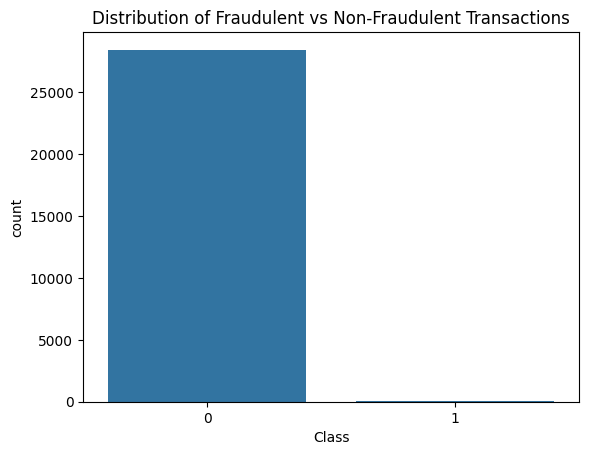

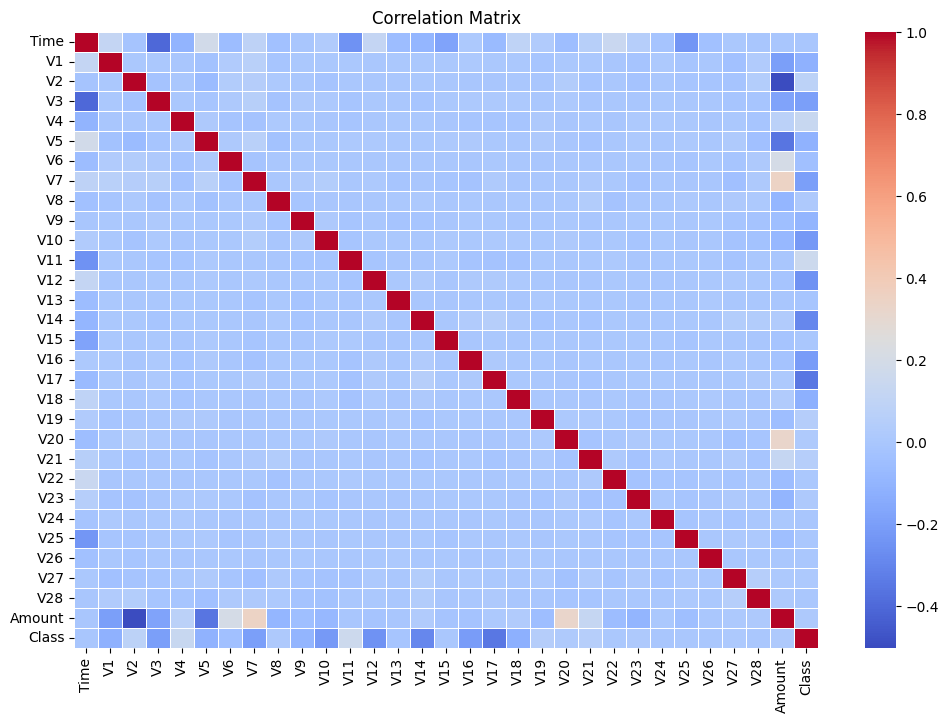

In [9]:
# Class distribution
sns.countplot(x='Class', data=sample_data)
plt.title('Distribution of Fraudulent vs Non-Fraudulent Transactions')
plt.show()

# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(sample_data.corr(), annot=False, cmap='coolwarm', fmt='.1f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


***Step 3: Modifying***

In [21]:
# Check for missing values
print(sample_data.isnull().sum())



Time             0
V1               0
V2               0
V3               0
V4               0
V5               0
V6               0
V7               0
V8               0
V9               0
V10              0
V11              0
V12              0
V13              0
V14              0
V15              0
V16              0
V17              0
V18              0
V19              0
V20              0
V21              0
V22              0
V23              0
V24              0
V25              0
V26              0
V27              0
V28              0
Class            0
scaled_amount    0
dtype: int64


In [24]:
# Check the columns of the sample_data
print(sample_data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class',
       'scaled_amount'],
      dtype='object')


In [26]:
# No missing values, but let's scale the features for better performance
from sklearn.preprocessing import StandardScaler

X = sample_data.drop(['Class'], axis=1)  # Use all columns except Class
y = sample_data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

***Step 4: Modeling***

In [27]:
# Fit a Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

***Step 5: Assessing***

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8531
           1       0.92      0.86      0.89        14

    accuracy                           1.00      8545
   macro avg       0.96      0.93      0.94      8545
weighted avg       1.00      1.00      1.00      8545



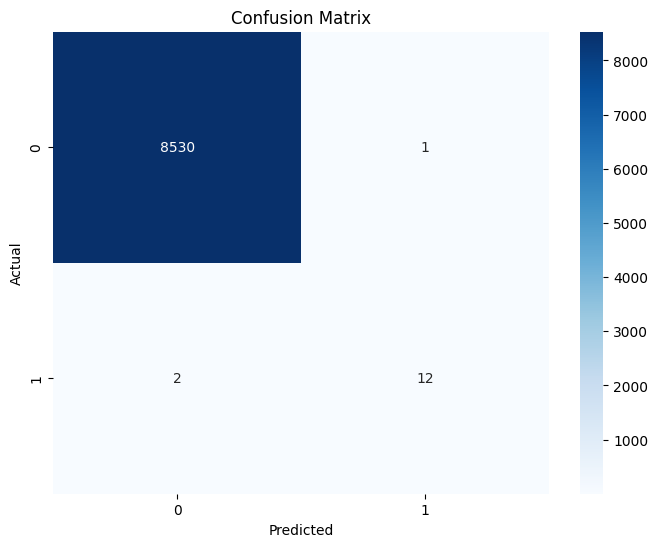

In [29]:
#from sklearn.metrics import classification_report, confusion_matrix, ROCCurveDisplay
#from sklearn.metrics import plot_roc_curve
from sklearn.metrics import RocCurveDisplay

# Make predictions
y_pred = model.predict(X_test)

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [30]:
y_scores = model.predict_proba(X_test)[:, 1]  # Get predicted probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

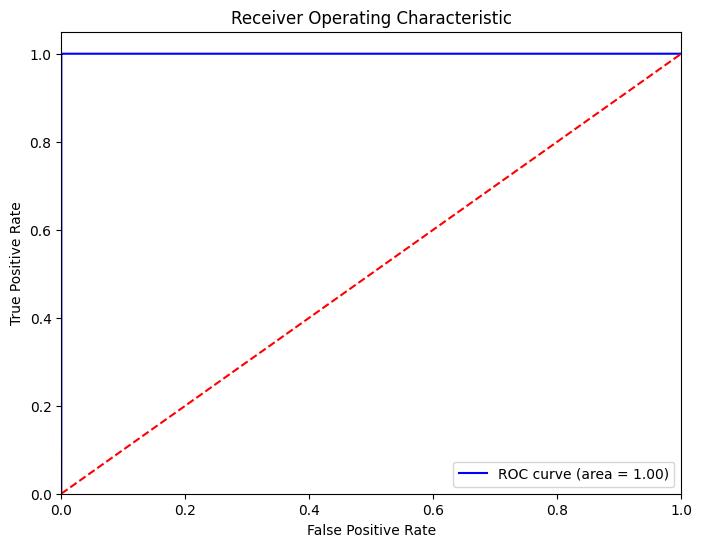

In [31]:
# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()